#### Importing Dependencies

In [20]:
import nltk
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd

## Loading the corpus and the results

#### Downloading the brown corpus and universal tagset

In [2]:
nltk.download('universal_tagset')
nltk.download('brown')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/pulkit/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package brown to /home/pulkit/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

#### Checking if we are in the HMM directory

In [3]:
if os.getcwd().endswith('HMM') == False:
    os.chdir('HMM')

##### If the results are not present, run the cross_validation.py file

In [4]:
#if either of HMM_symbolic_results.pkl or HMM_vector_results.pkl are not present, run the cross-validation script
try:
    with open('HMM_symbolic_results.pkl', 'rb') as f:
        HMM_symbolic_results = pickle.load(f)
    with open('HMM_vector_results.pkl', 'rb') as f:
        HMM_vector_results = pickle.load(f)
except:
    print("Running cross-validation script (this may take a while ~7 min) ...")
    #if you are using a Mac, comment out the below line and use the one after it
    os.system('python cross_validation.py')
    #os.system('python3 cross_validation.py')
    with open('HMM_symbolic_results.pkl', 'rb') as f:
        HMM_symbolic_results = pickle.load(f)
    with open('HMM_vector_results.pkl', 'rb') as f:
        HMM_vector_results = pickle.load(f)

## Visualizing the results

In [5]:
TAGSET = HMM_symbolic_results['tag_set']

In [6]:
print("HMM_symbolic model 5-fold cross-validation accuracy:", HMM_symbolic_results['accuracy'])

HMM_symbolic model 5-fold cross-validation accuracy: 0.9520934433271959


#### HMM Viterbi Symbolic Confusion Matrix

<Axes: >

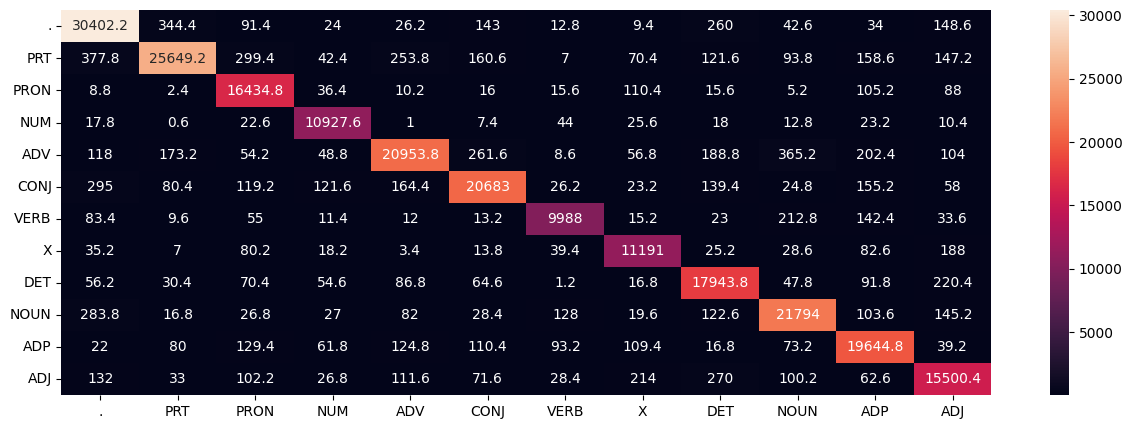

In [7]:
#using sns.heatmap to plot the confusion matrix
plt.figure(figsize=(15,5))
sns.heatmap(HMM_symbolic_results['confusion_matrix'], annot=True, fmt='g', xticklabels=TAGSET , yticklabels=TAGSET )

In [8]:
#calculating the per pos accuracy from the confusion matrix
def get_pos_accuracies(confusion_matrix, tag_set):
    per_pos_accuracy = np.diag(confusion_matrix)/np.sum(confusion_matrix, axis=1)
    per_pos_accuracy = np.round(per_pos_accuracy, 3)
#store the per pos accuracy in a dictionary
    per_pos_accuracy_dict = {}
    for i, tag in enumerate(tag_set):
        per_pos_accuracy_dict[tag] = per_pos_accuracy[i]
    print("Per POS accuracy: ")
    for key in per_pos_accuracy_dict:
        print(key,': ', per_pos_accuracy_dict[key])

In [9]:
get_pos_accuracies(HMM_symbolic_results['confusion_matrix'], TAGSET)

Per POS accuracy: 
. :  0.964
PRT :  0.937
PRON :  0.975
NUM :  0.983
ADV :  0.93
CONJ :  0.945
VERB :  0.942
X :  0.955
DET :  0.96
NOUN :  0.957
ADP :  0.958
ADJ :  0.931


In [18]:
confusion_matrix = HMM_symbolic_results['confusion_matrix'] 
print(c_mat.shape)

num_tags = confusion_matrix.shape[0]
precision = np.zeros(num_tags)
recall = np.zeros(num_tags)
f1_score = np.zeros(num_tags)
f2_score = np.zeros(num_tags) 
f0_5_score = np.zeros(num_tags)

(12, 12)


In [19]:
for i in range(num_tags):
    tp = confusion_matrix[i, i]
    fp = np.sum(confusion_matrix[:, i]) - tp
    fn = np.sum(confusion_matrix[i, :]) - tp
    tn = np.sum(confusion_matrix) - tp - fp - fn
    
    precision[i] = tp / (tp + fp)
    recall[i] = tp / (tp + fn)
    f1_score[i] = 2 * precision[i] * recall[i] / (precision[i] + recall[i])
    f2_score[i] = (5 * precision[i] * recall[i]) / (4 * precision[i] + recall[i])
    f0_5_score[i] = (1.25 * precision[i] * recall[i]) / (0.25 * precision[i] + recall[i])

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)
print('F2 Score:', f2_score) 
print('F0.5_score:', f0_5_score)

Precision: [0.95507693 0.97056798 0.93990484 0.95851096 0.95986257 0.95871806
 0.96108695 0.94344872 0.93726756 0.95583527 0.94417102 0.92911347]
Recall: [0.96396796 0.93672439 0.9754401  0.98349383 0.92981709 0.9448434
 0.94229971 0.95546676 0.9603421  0.95680882 0.95804926 0.93079842]
F1 Score: [0.95950185 0.95334592 0.95734282 0.9708417  0.94460097 0.95173017
 0.95160061 0.94941971 0.94866454 0.9563218  0.95105951 0.92995518]
F2 Score: [0.96217654 0.94330297 0.9681197  0.97839361 0.93567476 0.94758611
 0.94599817 0.95303872 0.95563674 0.95661395 0.95524107 0.93046094]
F0.5_score: [0.956842   0.96360502 0.94680324 0.96340547 0.95369914 0.95591063
 0.95726981 0.94582808 0.94179333 0.95602982 0.94691441 0.92944997]


In [23]:
metrics_symbolic = pd.DataFrame({
    'Precision':precision,
    'Recall': recall, 
    'F1 Score': f1_score, 
    'F2 Score': f2_score,
    'F0.5 Score': f0_5_score
})

In [24]:
metrics_symbolic

,Precision,Recall,F1 Score,F2 Score,F0.5 Score
0,0.955077,0.963968,0.959502,0.962177,0.956842
1,0.970568,0.936724,0.953346,0.943303,0.963605
2,0.939905,0.975440,0.957343,0.968120,0.946803
3,0.958511,0.983494,0.970842,0.978394,0.963405
4,0.959863,0.929817,0.944601,0.935675,0.953699
5,0.958718,0.944843,0.951730,0.947586,0.955911
6,0.961087,0.942300,0.951601,0.945998,0.957270
7,0.943449,0.955467,0.949420,0.953039,0.945828
8,0.937268,0.960342,0.948665,0.955637,0.941793
9,0.955835,0.956809,0.956322,0.956614,0.956030


#### HMM Viterbi Vector Confusion Matrix

In [10]:
print("HMM_vector model 5-fold cross-validation accuracy:", HMM_vector_results['accuracy'])

HMM_vector model 5-fold cross-validation accuracy: 0.9520957895531815


<Axes: >

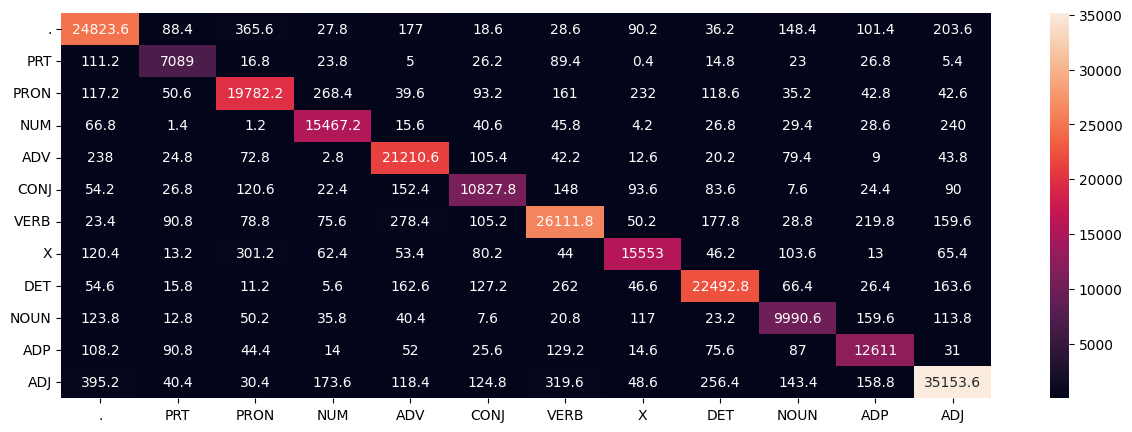

In [11]:
# using sns.heatmap to plot the confusion matrix
plt.figure(figsize=(15,5))
sns.heatmap(HMM_vector_results['confusion_matrix'], annot=True, fmt='g', xticklabels=TAGSET , yticklabels=TAGSET )

In [12]:
# calculating the per pos accuracy from the confusion matrix
get_pos_accuracies(HMM_vector_results['confusion_matrix'], TAGSET)

Per POS accuracy: 
. :  0.951
PRT :  0.954
PRON :  0.943
NUM :  0.969
ADV :  0.97
CONJ :  0.929
VERB :  0.953
X :  0.945
DET :  0.96
NOUN :  0.934
ADP :  0.949
ADJ :  0.951


In [25]:
confusion_matrix = HMM_vector_results['confusion_matrix'] 
print(c_mat.shape)

num_tags = confusion_matrix.shape[0]
precision = np.zeros(num_tags)
recall = np.zeros(num_tags)
f1_score = np.zeros(num_tags)
f2_score = np.zeros(num_tags) 
f0_5_score = np.zeros(num_tags)

(12, 12)


In [26]:
for i in range(num_tags):
    tp = confusion_matrix[i, i]
    fp = np.sum(confusion_matrix[:, i]) - tp
    fn = np.sum(confusion_matrix[i, :]) - tp
    tn = np.sum(confusion_matrix) - tp - fp - fn
    
    precision[i] = tp / (tp + fp)
    recall[i] = tp / (tp + fn)
    f1_score[i] = 2 * precision[i] * recall[i] / (precision[i] + recall[i])
    f2_score[i] = (5 * precision[i] * recall[i]) / (4 * precision[i] + recall[i])
    f0_5_score[i] = (1.25 * precision[i] * recall[i]) / (0.25 * precision[i] + recall[i])

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)
print('F2 Score:', f2_score) 
print('F0.5_score:', f0_5_score)

Precision: [0.94614394 0.93958753 0.94763214 0.95598106 0.95091771 0.93484943
 0.95290194 0.95634262 0.9623741  0.92998101 0.93960482 0.96808804]
Recall: [0.95075337 0.95387389 0.94275475 0.96866154 0.97022176 0.92931322
 0.95297845 0.9451264  0.95980337 0.93408504 0.94938043 0.9510432 ]
F1 Score: [0.94844305 0.94667682 0.94518715 0.96227953 0.96047275 0.9320731
 0.95294019 0.95070143 0.96108702 0.93202851 0.94446733 0.95948993]
F2 Score: [0.94982789 0.95098197 0.94372621 0.9660986  0.9662985  0.93041521
 0.95296314 0.94734854 0.96031642 0.93326134 0.94740907 0.95440398]
F0.5_score: [0.94706224 0.94241047 0.94665263 0.95849053 0.95471682 0.93373691
 0.95291724 0.95407813 0.96185885 0.93079893 0.9415438  0.96463037]


In [27]:
metrics_vector = pd.DataFrame({
    'Precision':precision,
    'Recall': recall, 
    'F1 Score': f1_score, 
    'F2 Score': f2_score,
    'F0.5 Score': f0_5_score
})
metrics_vector

,Precision,Recall,F1 Score,F2 Score,F0.5 Score
0,0.946144,0.950753,0.948443,0.949828,0.947062
1,0.939588,0.953874,0.946677,0.950982,0.942410
2,0.947632,0.942755,0.945187,0.943726,0.946653
3,0.955981,0.968662,0.962280,0.966099,0.958491
4,0.950918,0.970222,0.960473,0.966299,0.954717
5,0.934849,0.929313,0.932073,0.930415,0.933737
6,0.952902,0.952978,0.952940,0.952963,0.952917
7,0.956343,0.945126,0.950701,0.947349,0.954078
8,0.962374,0.959803,0.961087,0.960316,0.961859
9,0.929981,0.934085,0.932029,0.933261,0.930799
